## HOG descriptor
https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

HOG (Histogram of Oriented Gradients) - histogram gradientów zorientowanych (HOG). Jest to deskryptor cech stosowany w computer vision i cyfrowym przetwarzaniu obrazu w celu wykrywania obiektów. Jako cechy, na podstawie których wykonywana jest klasyfikacja, HOG wykorzystuje rozkład (histogramy) kierunków gradientów.

In [2]:
# Import bibliotek
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

(268, 182, 3)


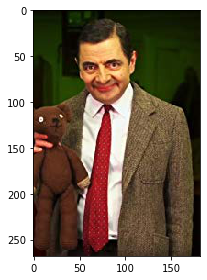

In [4]:
# Wczytanie obrazu
img = imread('D:/PYTHON_PROJ/HOG/MR_BEAN/test_img.jpg')
imshow(img)
print(img.shape)

Wejściowy rozmiar obrazu wynosi 268x182 pix. Należy przeskalować go do rozmiaru 64x128 pix.

(128, 64, 3)


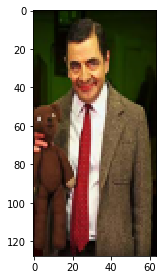

In [9]:
# Przeskalowanie obrazu
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

Funkcja HOG zostanie wykorzystana bezpośrednio z biblioteki skiimage. Gradienty i ich magnitudy i orientacja nie będą tu obliczane oddzielnie. 

Hyperparams:

- The orientations are the number of buckets we want to create. Since I want to have a 9 x 1 matrix, I will set the orientations to 9 
- Pixels_per_cell defines the size of the cell for which we create the histograms. In the example I used 8 x 8 cells and here I will set the same value.
- cells_per_block is the size of the block over which we normalize the histogram. Here, we mention the cells per blocks and not the number of pixels. So, instead of writing 16 x 16, we will use 2 x 2 here.

In [10]:
# Wygenerowanie cech HOG
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

Wynikowa macierz cech jest przechowywana w zmiannej fd, natomiast obraz w zmiannej hog_image. 

In [7]:
# Rozmiar macierzy wynikowej
fd.shape

(3780,)

Jak widać otrzymano 3780 cech dla analizowanego obrazu.

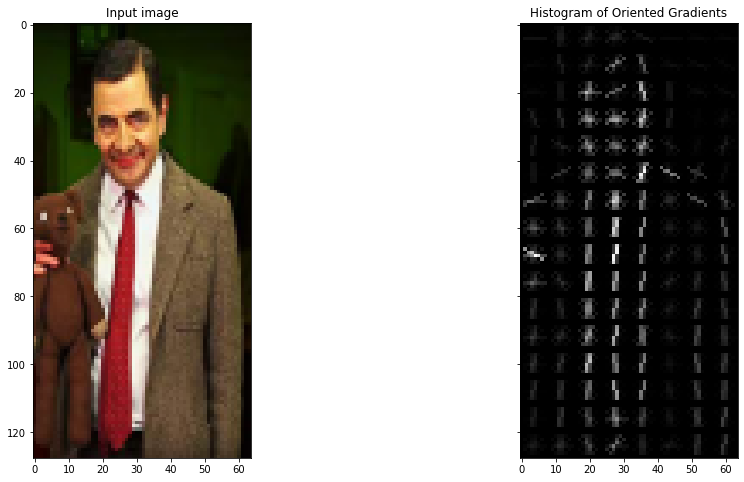

In [11]:
# Wizualizacja obrazu wejściowego i utworzonego deskryptora HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Przeskalowanie histogramów dla lepszej wizualizacji
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()